In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import yfinance as yf
import pandas as pd, numpy as np
import fit

In [4]:
data = yf.download("NVDA",  start="2018-01-01", end="2023-01-01")
df = pd.Series(data['Close'])

[*********************100%***********************]  1 of 1 completed


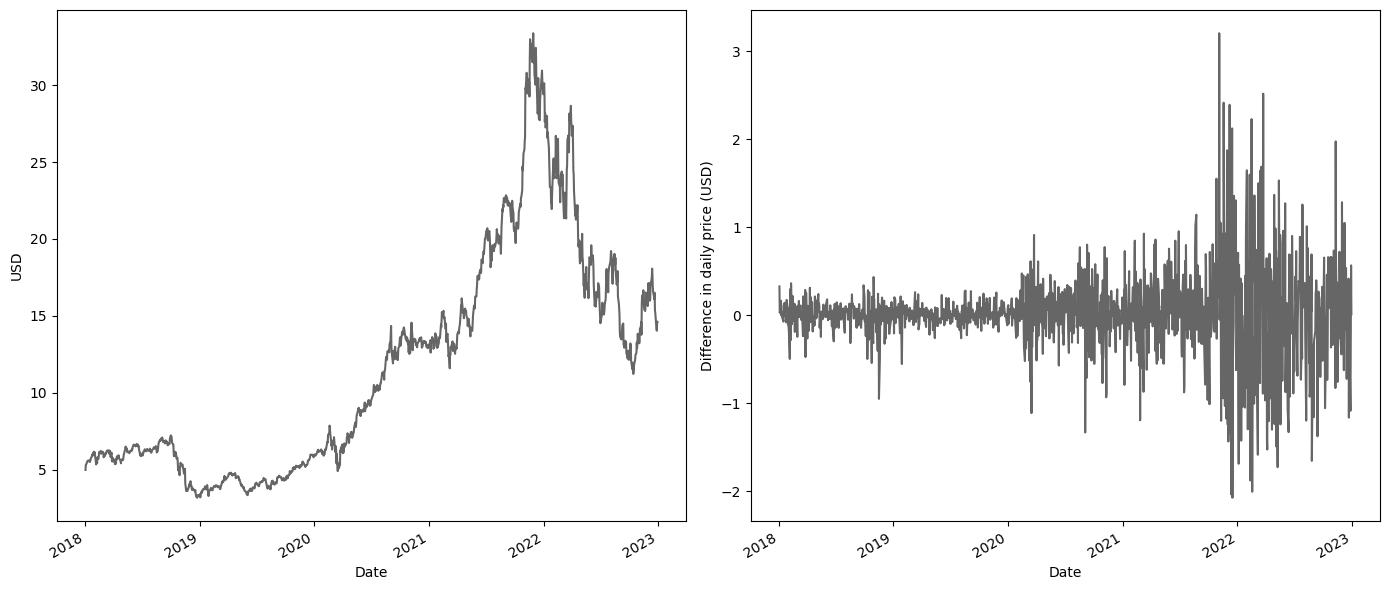

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

df.plot(ax=axes[0], alpha=0.6, color="#000000", ylabel="USD")

diff = df.diff()
diff.dropna(inplace=True)
diff.plot(ax=axes[1], alpha=0.6, color="#000000", ylabel="Difference in daily price (USD)")

plt.tight_layout()
plt.show()

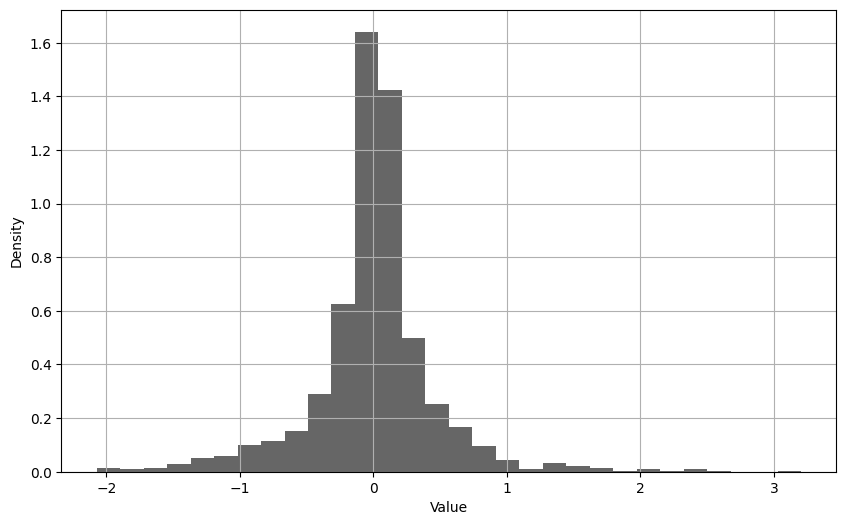

In [19]:
fit.plot_histogram(diff, bins=30)


Normal: AIC = 1685.0638093412667, BIC = 1695.3383662157876, params = {'mu': np.float64(0.0076552070381152425), 'std': np.float64(0.4719939244431167)}
Student's T: AIC = 1124.7958182266507, BIC = 1140.207653538432, params = {'df': np.float64(1.5744349699042681), 'loc': np.float64(0.016288505720133815), 'scale': np.float64(0.18842294683169475)}
GMM_2: AIC = 1111.6556945326233, BIC = 1137.3420867189252
GMM_3: AIC = 1134.3436867796122, BIC = 1175.4419142776953
GMM_4: AIC = 1103.499742861926, BIC = 1160.0098056717902


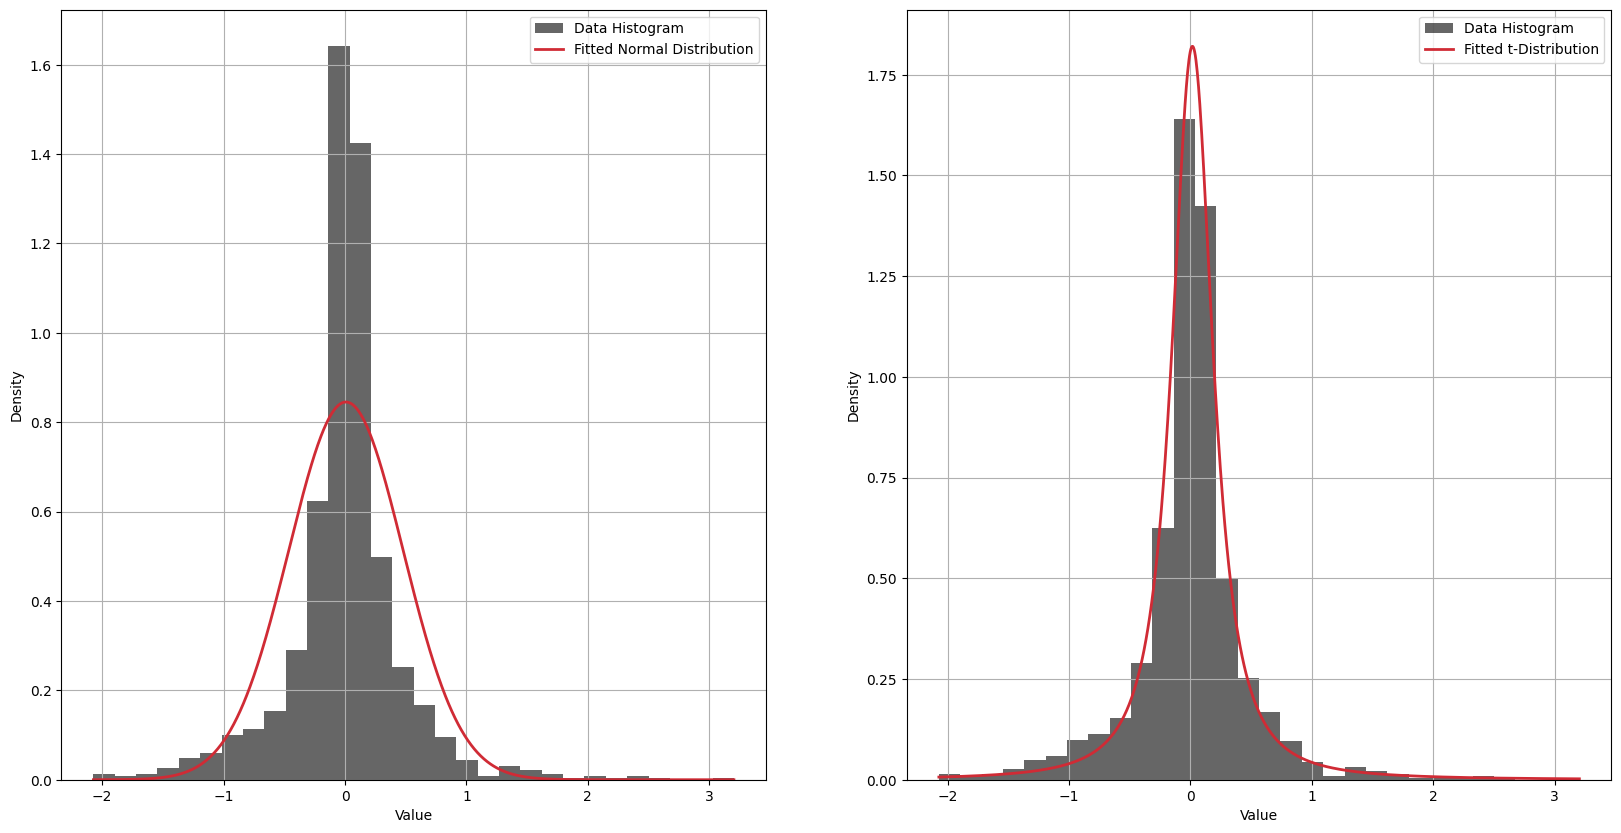

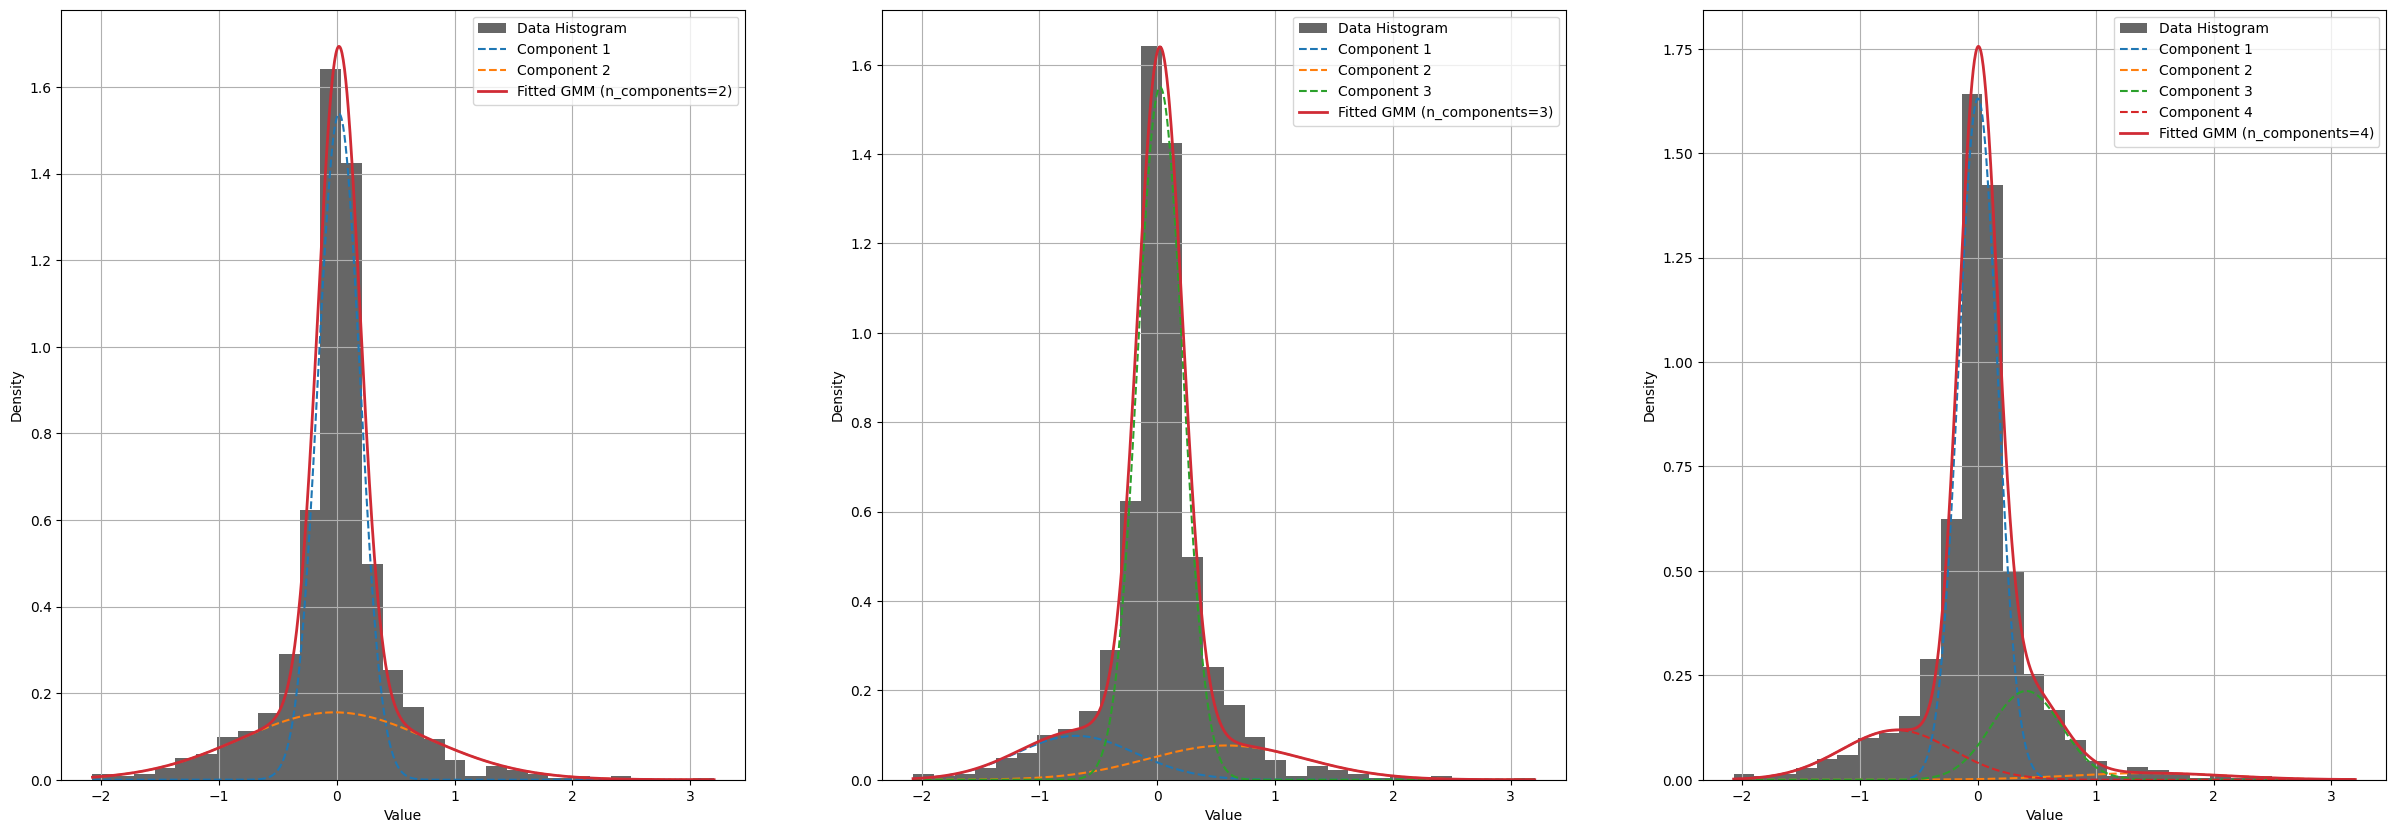

In [35]:
import matplotlib.pyplot as plt

data = diff.values


fig, axes = plt.subplots(1, 2, figsize=(20, 10))

AIC_norm, BIC_norm, params = fit.fit_norm(data)
fit.plot_norm(data, **params , ax=axes[0])

AIC_t, BIC_t, params_t = fit.fit_t(data)
fit.plot_t(data, **params_t, ax=axes[1])

fig, axes = plt.subplots(1, 3, figsize=(30, 10))

AIC_gmm2, BIC_gmm2, gmm2 = fit.fit_gmm(data, n_components=2)
fit.plot_gmm(data, gmm2, n_components=2, ax=axes[0])

AIC_gmm3, BIC_gmm3, gmm3 = fit.fit_gmm(data, n_components=3)
fit.plot_gmm(data, gmm3, n_components=3, ax=axes[1])

AIC_gmm4, BIC_gmm4, gmm4 = fit.fit_gmm(data, n_components=4)
fit.plot_gmm(data, gmm4, n_components=4, ax=axes[2])

print(f"Normal: AIC = {AIC_norm}, BIC = {BIC_norm}, params = {params}")
print(f"Student's T: AIC = {AIC_t}, BIC = {BIC_t}, params = {params_t}")
print(f"GMM_2: AIC = {AIC_gmm2}, BIC = {BIC_gmm2}")
# print(gmm2.means_,"\n",gmm2.covariances_,"\n",gmm2.weights_)
# print()
print(f"GMM_3: AIC = {AIC_gmm3}, BIC = {BIC_gmm3}")
# print(gmm3.means_ ,"\n",gmm3.covariances_,"\n",gmm3.weights_)
# print()
print(f"GMM_4: AIC = {AIC_gmm4}, BIC = {BIC_gmm4}")
# print(gmm4.means_ ,"\n",gmm4.covariances_,"\n",gmm4.weights_)

